<a href="https://colab.research.google.com/github/shafiqulrehman/AlzheimerCode/blob/main/DARWIN_Base_level_ranking_uisng_Coefficient_of_Variation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cross Variation based ranking of the classiifers, where CV = standard deviation / mean**

This code is used to generate Figure 4 (main text) and Supplementary Figure S5

<ipython-input-1-86bb157b26cc>:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_classifiers, rotation=45)  # Rotate y-axis labels by 45 degrees


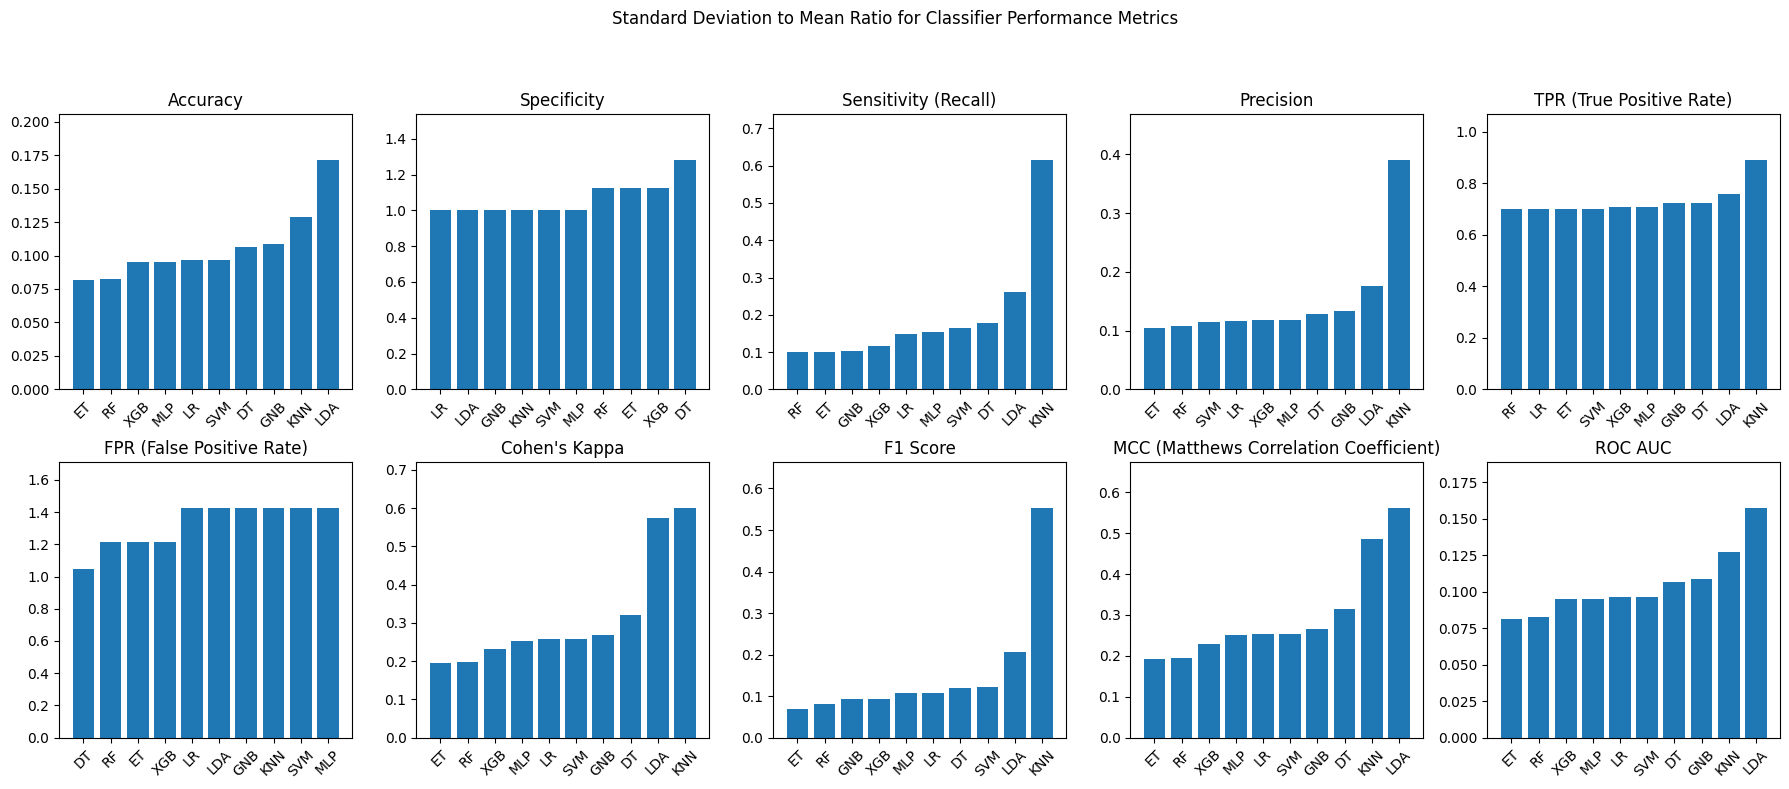

In [ ]:
############ CV based ranking of the classiifers using RCV

import numpy as np
import matplotlib.pyplot as plt

# Data for each classifier
classifiers = ["RF", "LR", "LDA", "GNB", "ET", "XGB", "KNN", "SVM", "MLP", "DT"]

# Metrics data for each classifier
metrics = {
    "Accuracy": {
        "mean": [0.85, 0.83, 0.70, 0.83, 0.86, 0.84, 0.62, 0.83, 0.84, 0.75],
        "std": [0.07, 0.08, 0.12, 0.09, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08],
    },
    "Specificity": {
        "mean": [0.89, 1.00, 1.00, 1.00, 0.89, 0.89, 1.00, 1.00, 1.00, 0.78],
        "std": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    },
    "Sensitivity (Recall)": {
        "mean": [0.90, 0.81, 0.65, 0.88, 0.89, 0.86, 0.26, 0.79, 0.84, 0.73],
        "std": [0.09, 0.12, 0.17, 0.09, 0.09, 0.10, 0.16, 0.13, 0.13, 0.13],
    },
    "Precision": {
        "mean": [0.84, 0.86, 0.74, 0.82, 0.86, 0.85, 0.87, 0.87, 0.85, 0.78],
        "std": [0.09, 0.10, 0.13, 0.11, 0.09, 0.10, 0.34, 0.10, 0.10, 0.10],
    },
    "TPR (True Positive Rate)": {
        "mean": [0.67, 0.67, 0.54, 0.58, 0.67, 0.62, 0.46, 0.67, 0.62, 0.58],
        "std": [0.47, 0.47, 0.41, 0.42, 0.47, 0.44, 0.41, 0.47, 0.44, 0.42],
    },
    "FPR (False Positive Rate)": {
        "mean": [0.37, 0.33, 0.33, 0.33, 0.37, 0.37, 0.33, 0.33, 0.33, 0.41],
        "std": [0.45, 0.47, 0.47, 0.47, 0.45, 0.45, 0.47, 0.47, 0.47, 0.43],
    },
    "Cohen's Kappa": {
        "mean": [0.71, 0.66, 0.40, 0.67, 0.72, 0.69, 0.25, 0.66, 0.67, 0.50],
        "std": [0.14, 0.17, 0.23, 0.18, 0.14, 0.16, 0.15, 0.17, 0.17, 0.16],
    },
    "F1 Score": {
        "mean": [0.86, 0.83, 0.68, 0.85, 0.87, 0.85, 0.38, 0.82, 0.84, 0.75],
        "std": [0.07, 0.09, 0.14, 0.08, 0.06, 0.08, 0.21, 0.10, 0.09, 0.09],
    },
    "MCC (Matthews Correlation Coefficient)": {
        "mean": [0.72, 0.67, 0.41, 0.68, 0.73, 0.70, 0.35, 0.67, 0.68, 0.51],
        "std": [0.14, 0.17, 0.23, 0.18, 0.14, 0.16, 0.17, 0.17, 0.17, 0.16],
    },
    "ROC AUC": {
        "mean": [0.85, 0.83, 0.70, 0.83, 0.86, 0.84, 0.63, 0.83, 0.84, 0.75],
        "std": [0.07, 0.08, 0.11, 0.09, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08],
    },
}

# Create a figure and subplots for each metric in a 2x5 grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))
fig.suptitle("Standard Deviation to Mean Ratio for Classifier Performance Metrics")

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, (metric, data) in enumerate(metrics.items()):
    ax = axes[i]
    mean_values = data["mean"]
    std_values = data["std"]
    ratio = [(std / mean) if mean != 0 and std != 0 else 1 / mean for mean, std in zip(mean_values, std_values)
             ]
    # Sort classifiers based on the ratio values
    sorted_classifiers, sorted_ratio = zip(*sorted(zip(classifiers, ratio), key=lambda x: x[1]))

    ax.bar(sorted_classifiers, sorted_ratio, capsize=5)
    ax.set_title(f"{metric}")
    ax.set_ylim([0, max(sorted_ratio) * 1.2])
    ax.set_xticklabels(sorted_classifiers, rotation=45)  # Rotate y-axis labels by 45 degrees

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


<ipython-input-12-9d5a1580177c>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_classifiers, rotation=45)  # Rotate y-axis labels by 45 degrees


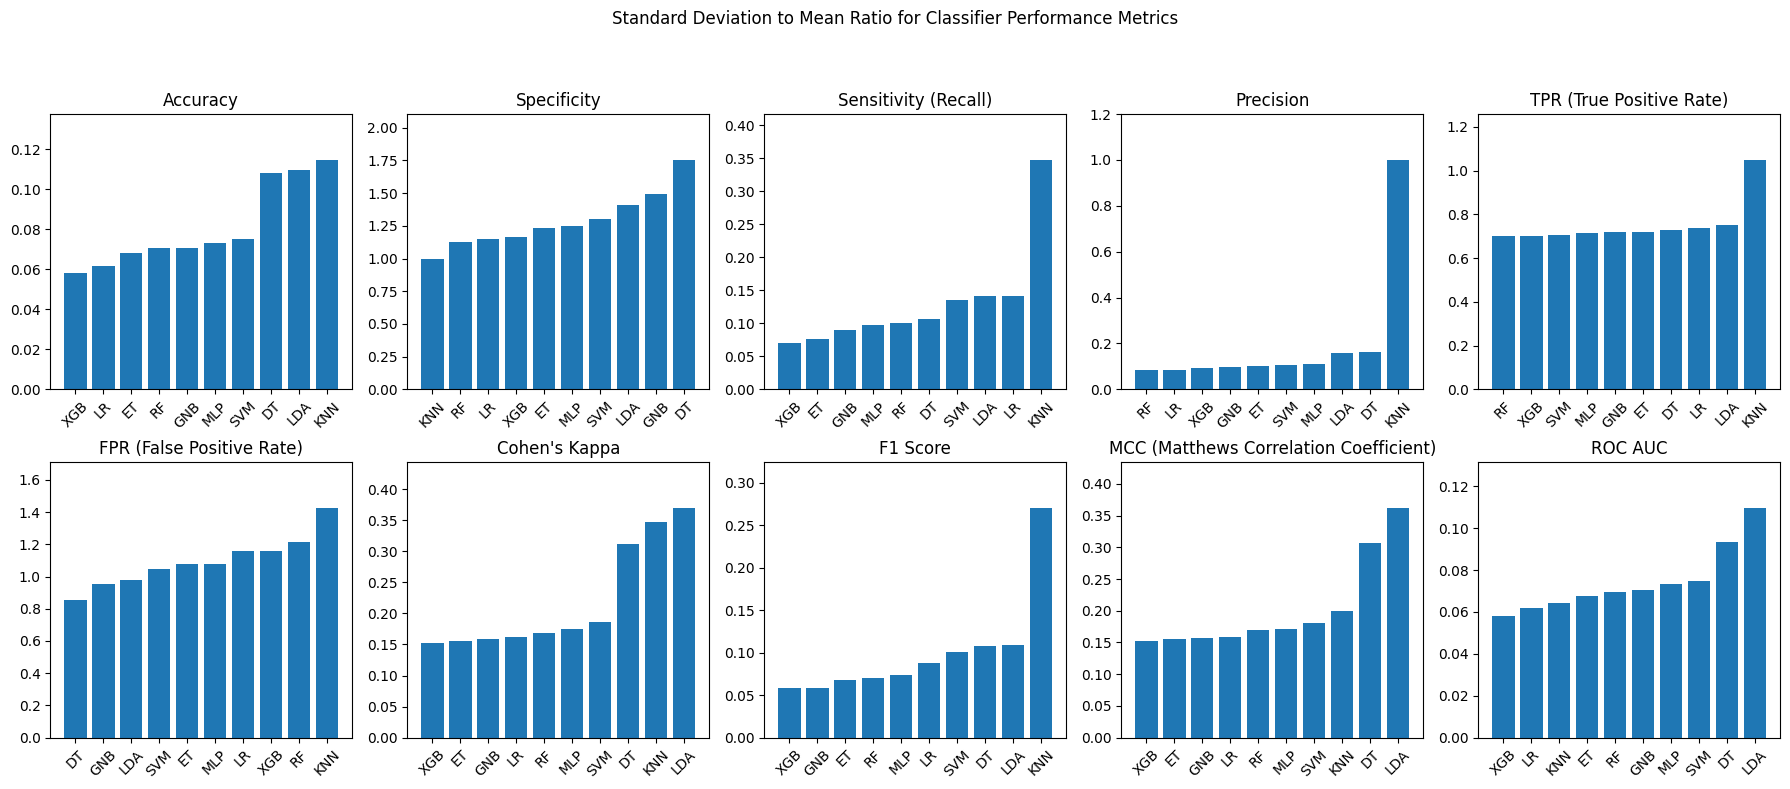

In [ ]:
############ CV based ranking of the classiifers using MCCV


import numpy as np
import matplotlib.pyplot as plt

# Data for each classifier
classifiers = ["RF", "LR", "LDA", "GNB", "ET", "XGB", "KNN", "SVM", "MLP", "DT"]

# Metrics data for each classifier
metrics = {
    "Accuracy": {
        "mean": [0.85, 0.81, 0.73, 0.85, 0.88, 0.86, 0.61, 0.80, 0.82, 0.74],
        "std": [0.06, 0.05, 0.08, 0.06, 0.06, 0.05, 0.07, 0.06, 0.06, 0.08],
    },
    "Specificity": {
        "mean": [0.89, 0.87, 0.71, 0.67, 0.81, 0.86, 1.00, 0.77, 0.80, 0.57],
        "std": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    },
    "Sensitivity (Recall)": {
        "mean": [0.89, 0.78, 0.71, 0.89, 0.91, 0.86, 0.23, 0.74, 0.82, 0.75],
        "std": [0.09, 0.11, 0.10, 0.08, 0.07, 0.06, 0.08, 0.10, 0.08, 0.08],
    },
    "Precision": {
        "mean": [0.84, 0.83, 0.76, 0.83, 0.87, 0.86, 1.00, 0.85, 0.81, 0.74],
        "std": [0.07, 0.07, 0.12, 0.08, 0.09, 0.08, 0.00, 0.09, 0.09, 0.12],
    },
    "TPR (True Positive Rate)": {
        "mean": [0.67, 0.57, 0.56, 0.61, 0.61, 0.64, 0.41, 0.61, 0.60, 0.59],
        "std": [0.47, 0.42, 0.42, 0.44, 0.44, 0.45, 0.43, 0.43, 0.43, 0.43],
    },
    "FPR (False Positive Rate)": {
        "mean": [0.37, 0.38, 0.43, 0.44, 0.40, 0.38, 0.33, 0.41, 0.40, 0.48],
        "std": [0.45, 0.44, 0.42, 0.42, 0.43, 0.44, 0.47, 0.43, 0.43, 0.41],
    },
    "Cohen's Kappa": {
        "mean": [0.71, 0.62, 0.46, 0.69, 0.77, 0.72, 0.23, 0.59, 0.63, 0.48],
        "std": [0.12, 0.10, 0.17, 0.11, 0.12, 0.11, 0.08, 0.11, 0.11, 0.15],
    },
    "F1 Score": {
        "mean": [0.86, 0.80, 0.73, 0.85, 0.89, 0.86, 0.37, 0.79, 0.81, 0.74],
        "std": [0.06, 0.07, 0.08, 0.05, 0.06, 0.05, 0.10, 0.08, 0.06, 0.08],
    },
    "MCC (Matthews Correlation Coefficient)": {
        "mean": [0.71, 0.63, 0.47, 0.70, 0.77, 0.72, 0.35, 0.61, 0.64, 0.49],
        "std": [0.12, 0.10, 0.17, 0.11, 0.12, 0.11, 0.07, 0.11, 0.11, 0.15],
    },
    "ROC AUC": {
        "mean": [0.86, 0.81, 0.73, 0.85, 0.89, 0.86, 0.62, 0.80, 0.82, 0.75],
        "std": [0.06, 0.05, 0.08, 0.06, 0.06, 0.05, 0.04, 0.06, 0.06, 0.07],
    },
}

# Create a figure and subplots for each metric in a 2x5 grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))
fig.suptitle("Standard Deviation to Mean Ratio for Classifier Performance Metrics")

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, (metric, data) in enumerate(metrics.items()):
    ax = axes[i]
    mean_values = data["mean"]
    std_values = data["std"]
    ratio = [(std / mean) if mean != 0 and std != 0 else 1 / mean for mean, std in zip(mean_values, std_values)]

    # Sort classifiers based on the ratio values
    sorted_classifiers, sorted_ratio = zip(*sorted(zip(classifiers, ratio), key=lambda x: x[1]))

    ax.bar(sorted_classifiers, sorted_ratio, capsize=5)
    ax.set_title(f"{metric}")
    ax.set_ylim([0, max(sorted_ratio) * 1.2])
    ax.set_xticklabels(sorted_classifiers, rotation=45)  # Rotate y-axis labels by 45 degrees

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


<ipython-input-1-a0449679db2a>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_classifiers, rotation=45)  # Rotate y-axis labels by 45 degrees


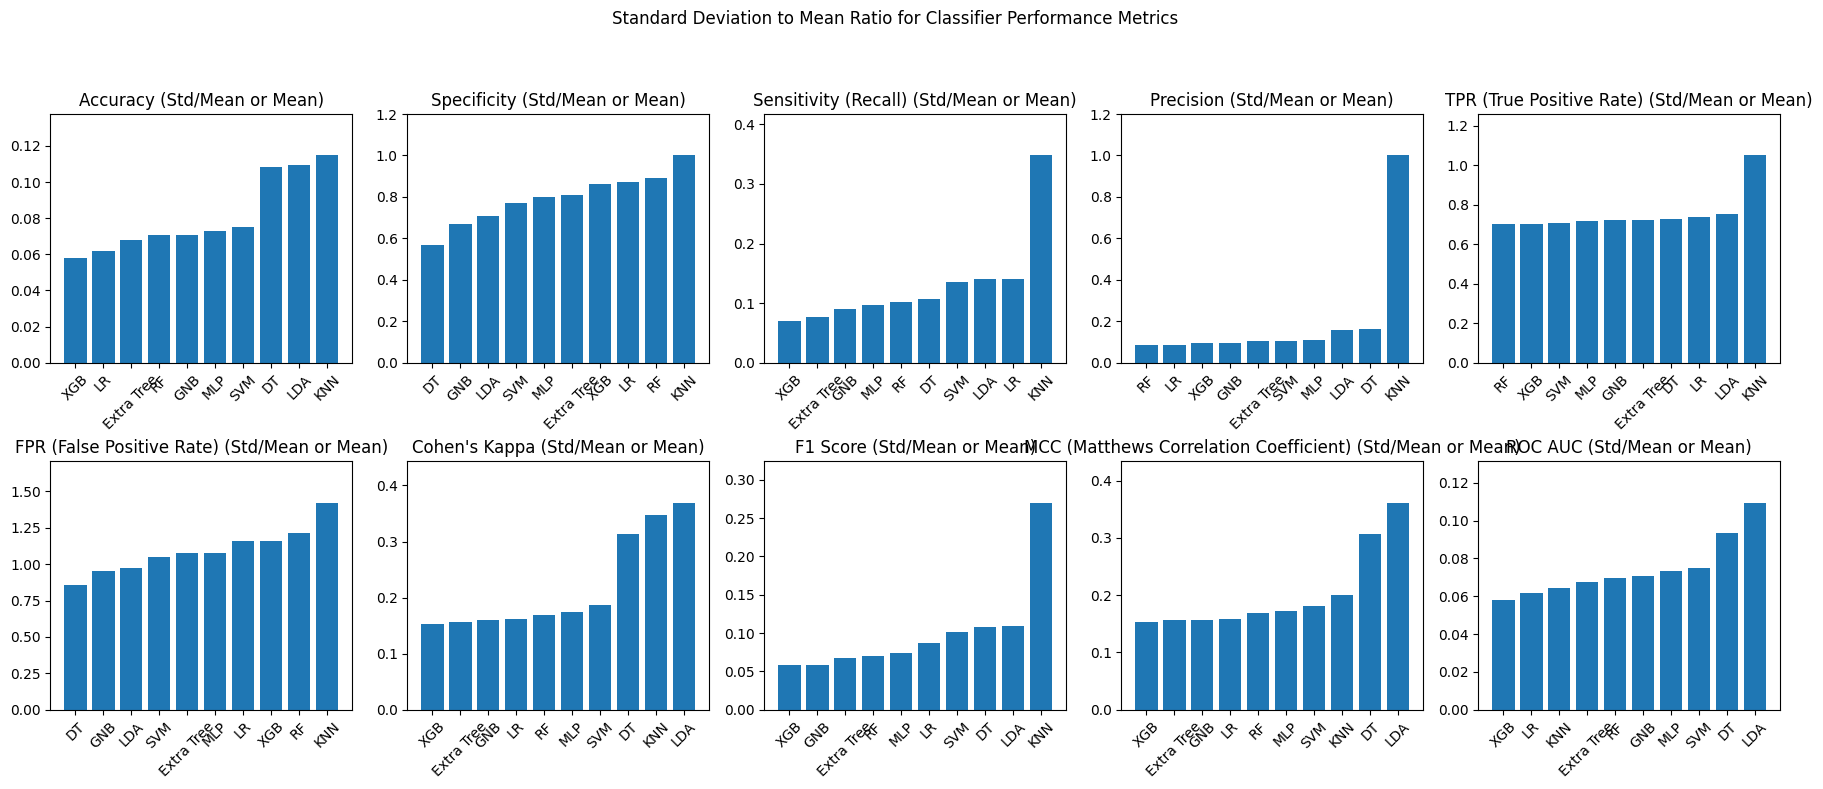

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for each classifier
classifiers = ["RF", "LR", "LDA", "GNB", "Extra Tree", "XGB", "KNN", "SVM", "MLP", "DT"]

# Metrics data for each classifier
metrics = {
    "Accuracy": {
        "mean": [0.85, 0.81, 0.73, 0.85, 0.88, 0.86, 0.61, 0.80, 0.82, 0.74],
        "std": [0.06, 0.05, 0.08, 0.06, 0.06, 0.05, 0.07, 0.06, 0.06, 0.08],
    },
    "Specificity": {
        "mean": [0.89, 0.87, 0.71, 0.67, 0.81, 0.86, 1.00, 0.77, 0.80, 0.57],
        "std": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    },
    "Sensitivity (Recall)": {
        "mean": [0.89, 0.78, 0.71, 0.89, 0.91, 0.86, 0.23, 0.74, 0.82, 0.75],
        "std": [0.09, 0.11, 0.10, 0.08, 0.07, 0.06, 0.08, 0.10, 0.08, 0.08],
    },
    "Precision": {
        "mean": [0.84, 0.83, 0.76, 0.83, 0.87, 0.86, 1.00, 0.85, 0.81, 0.74],
        "std": [0.07, 0.07, 0.12, 0.08, 0.09, 0.08, 0.00, 0.09, 0.09, 0.12],
    },
    "TPR (True Positive Rate)": {
        "mean": [0.67, 0.57, 0.56, 0.61, 0.61, 0.64, 0.41, 0.61, 0.60, 0.59],
        "std": [0.47, 0.42, 0.42, 0.44, 0.44, 0.45, 0.43, 0.43, 0.43, 0.43],
    },
    "FPR (False Positive Rate)": {
        "mean": [0.37, 0.38, 0.43, 0.44, 0.40, 0.38, 0.33, 0.41, 0.40, 0.48],
        "std": [0.45, 0.44, 0.42, 0.42, 0.43, 0.44, 0.47, 0.43, 0.43, 0.41],
    },
    "Cohen's Kappa": {
        "mean": [0.71, 0.62, 0.46, 0.69, 0.77, 0.72, 0.23, 0.59, 0.63, 0.48],
        "std": [0.12, 0.10, 0.17, 0.11, 0.12, 0.11, 0.08, 0.11, 0.11, 0.15],
    },
    "F1 Score": {
        "mean": [0.86, 0.80, 0.73, 0.85, 0.89, 0.86, 0.37, 0.79, 0.81, 0.74],
        "std": [0.06, 0.07, 0.08, 0.05, 0.06, 0.05, 0.10, 0.08, 0.06, 0.08],
    },
    "MCC (Matthews Correlation Coefficient)": {
        "mean": [0.71, 0.63, 0.47, 0.70, 0.77, 0.72, 0.35, 0.61, 0.64, 0.49],
        "std": [0.12, 0.10, 0.17, 0.11, 0.12, 0.11, 0.07, 0.11, 0.11, 0.15],
    },
    "ROC AUC": {
        "mean": [0.86, 0.81, 0.73, 0.85, 0.89, 0.86, 0.62, 0.80, 0.82, 0.75],
        "std": [0.06, 0.05, 0.08, 0.06, 0.06, 0.05, 0.04, 0.06, 0.06, 0.07],
    },
}

# Create a figure and subplots for each metric in a 2x5 grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))
fig.suptitle("Standard Deviation to Mean Ratio for Classifier Performance Metrics")

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, (metric, data) in enumerate(metrics.items()):
    ax = axes[i]
    mean_values = data["mean"]
    std_values = data["std"]
    ratio = [(std / mean) if mean != 0 and std != 0 else mean for mean, std in zip(mean_values, std_values)]

    # Sort classifiers based on the ratio values
    sorted_classifiers, sorted_ratio = zip(*sorted(zip(classifiers, ratio), key=lambda x: x[1]))

    ax.bar(sorted_classifiers, sorted_ratio, capsize=5)
    ax.set_title(f"{metric} (Std/Mean or Mean)")
    ax.set_ylim([0, max(sorted_ratio) * 1.2])
    ax.set_xticklabels(sorted_classifiers, rotation=45)  # Rotate y-axis labels by 45 degrees

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
